In [22]:
import sys
sys.path.insert(0,'/Users/alexandra/Documents/master_thesis')

"""
Magic commands
"""

%load_ext autoreload
%autoreload 2

"""
Load relevant packages
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import pandas_datareader as pdr
from pandas_datareader.yahoo.daily import YahooDailyReader


import datetime

"""
Load own functions/packages
"""

# set plotting style

from codelib.visualization.layout import DefaultStyle
DefaultStyle();

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
'''Import MSCI indices'''

msci = pd.read_csv("/Users/alexandra/Documents/master_thesis/msci.csv",index_col='Date',parse_dates=True)

msci

,MSCI US Minimum Volatility,MSCI US,MSCI US Momentum,MSCI US Quality,MSCI US High Dividend Yield,MSCI US Value,MSCI US Small Cap,MSCI US Equal Weight
Date,,,,,,,,
1994-06-30,419.991,414.388,154.736,209.467,406.212,592.169,67.819,438.422
1994-07-29,430.102,427.442,159.462,214.238,416.972,610.769,69.265,453.331
1994-08-31,442.821,443.324,166.509,226.912,428.839,626.936,73.727,473.073
1994-09-30,438.976,433.000,161.408,224.901,419.767,603.990,72.533,460.635
1994-10-31,440.705,442.000,164.207,232.265,425.403,617.713,72.596,465.615
...,...,...,...,...,...,...,...,...
2021-10-29,3643.382,4475.121,4119.983,3942.065,2590.819,3387.021,1018.327,5486.150
2021-11-30,3566.693,4424.065,3954.608,3932.813,2545.847,3288.414,973.331,5314.739
2021-12-31,3802.744,4593.595,3931.368,4085.888,2730.740,3506.952,1004.856,5553.091


In [24]:
'''Resample'''
msci=msci[(msci.index>='2019-12-29')&(msci.index.year<2021)]
msci

,MSCI US Minimum Volatility,MSCI US,MSCI US Momentum,MSCI US Quality,MSCI US High Dividend Yield,MSCI US Value,MSCI US Small Cap,MSCI US Equal Weight
Date,,,,,,,,
2019-12-31,3085.691,3076.489,2737.364,2680.537,2351.089,2881.477,725.913,3965.767
2020-01-31,3153.487,3078.776,2835.071,2693.692,2303.790,2803.999,706.120,3916.363
2020-02-28,2892.577,2822.375,2622.738,2486.848,2084.622,2525.600,643.750,3570.887
2020-03-31,2541.033,2459.870,2320.457,2268.287,1834.474,2123.249,496.699,2901.699
2020-04-30,2774.091,2780.191,2590.247,2532.242,2020.859,2343.895,570.173,3300.348
2020-05-29,2888.524,2918.447,2741.859,2676.321,2071.343,2402.211,610.096,3501.827
2020-06-30,2851.235,2980.733,2859.188,2704.300,2046.255,2379.042,628.791,3550.821
2020-07-31,2976.354,3153.988,3053.471,2825.062,2107.148,2463.588,653.456,3730.650
2020-08-31,3057.118,3385.293,3345.131,3049.110,2174.482,2554.709,682.367,3892.942


In [25]:
'''Normalize'''
msci_normalized=msci.div(msci.iloc[0])
msci_normalized

,MSCI US Minimum Volatility,MSCI US,MSCI US Momentum,MSCI US Quality,MSCI US High Dividend Yield,MSCI US Value,MSCI US Small Cap,MSCI US Equal Weight
Date,,,,,,,,
2019-12-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-01-31,1.021971,1.000743,1.035694,1.004908,0.979882,0.973112,0.972734,0.987542
2020-02-28,0.937416,0.917401,0.958125,0.927742,0.886662,0.876495,0.886814,0.900428
2020-03-31,0.823489,0.799571,0.847698,0.846206,0.780266,0.736861,0.684240,0.731687
2020-04-30,0.899018,0.903690,0.946256,0.944677,0.859542,0.813435,0.785456,0.832209
2020-05-29,0.936103,0.948629,1.001642,0.998427,0.881014,0.833673,0.840453,0.883014
2020-06-30,0.924018,0.968875,1.044504,1.008865,0.870343,0.825633,0.866207,0.895368
2020-07-31,0.964566,1.025191,1.115479,1.053916,0.896243,0.854974,0.900185,0.940713
2020-08-31,0.990740,1.100375,1.222026,1.137500,0.924883,0.886597,0.940012,0.981637


In [26]:
'''Calculate relative performance to MSCI US'''
msci_relative_performance=msci_normalized.iloc[:].div(msci_normalized['MSCI US'],axis=0)*100
msci_relative_performance

,MSCI US Minimum Volatility,MSCI US,MSCI US Momentum,MSCI US Quality,MSCI US High Dividend Yield,MSCI US Value,MSCI US Small Cap,MSCI US Equal Weight
Date,,,,,,,,
2019-12-31,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2020-01-31,102.121194,100.0,103.492449,100.416113,97.915421,97.238885,97.201107,98.680881
2020-02-28,102.181705,100.0,104.439073,101.127224,96.649341,95.541061,96.665904,98.149832
2020-03-31,102.991429,100.0,106.019117,105.832586,97.585592,92.157139,85.575988,91.509962
2020-04-30,99.483030,100.0,104.710290,104.535580,95.114708,90.012688,86.916616,92.090170
2020-05-29,98.679537,100.0,105.588379,105.249478,92.872365,87.881923,88.596621,93.083145
2020-06-30,95.370239,100.0,107.805881,104.127479,89.830326,85.215627,89.403400,92.413172
2020-07-31,94.086536,100.0,108.806935,102.801987,87.422113,83.396582,87.806589,91.759839
2020-08-31,90.036555,100.0,111.055400,103.373778,84.051574,80.572230,85.426487,89.209241


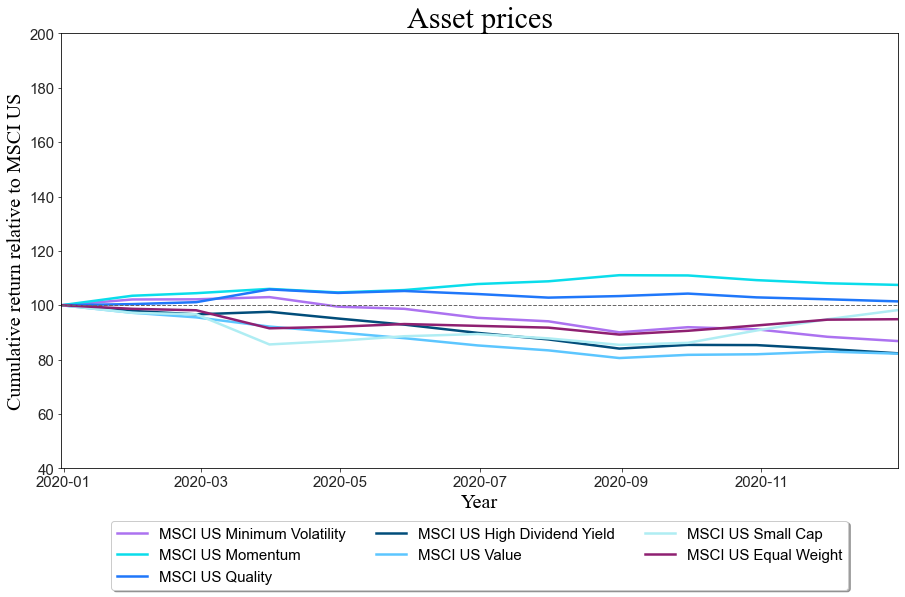

In [27]:
'''Plot the relative performance'''

years=msci_relative_performance.index
labels = ['MSCI US Minimum Volatility','MSCI US Momentum','MSCI US Quality','MSCI US High Dividend Yield','MSCI US Value','MSCI US Small Cap','MSCI US Equal Weight']
font = {'fontname':'Times New Roman'}

fig, ax = plt.subplots(figsize=(15, 8))
ax.set_xlabel('Year', fontsize = 20,**font);
ax.set_ylabel('Cumulative return relative to MSCI US', fontsize = 20,**font);
ax.set_title("Asset prices", fontsize = 30, **font);
ax.set_ylim([40,200])
ax = plt.plot(years, np.array(msci_relative_performance.iloc[:,[0,2,3,4,5,6,7]]), linewidth = 2.5)
plt.grid(color = "gray", linestyle = "--")
plt.legend(iter(ax), labels,loc='center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=3)
ax = plt.plot(years, np.array(msci_relative_performance.iloc[:,[1]]), linewidth = 1.0, linestyle='--')
